In [2]:
import psycopg2
import matplotlib.pyplot as plt
import numpy as np

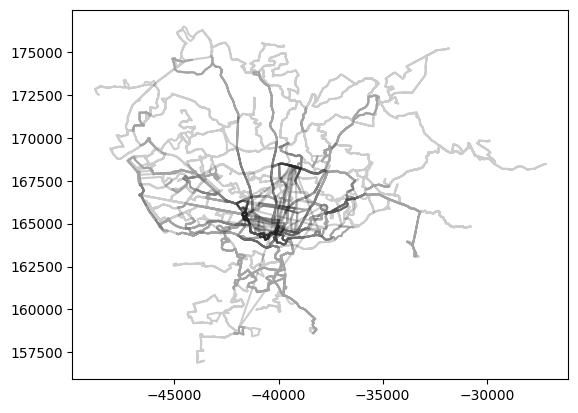

In [9]:
conn = psycopg2.connect("dbname=stcp user=postgres")
cursor_psql = conn.cursor()

######################### 
# plot the bus routes
######################### 

ids = {}
_id = 0
sql = "SELECT shape_id from shapes;"
cursor_psql.execute(sql)
results = cursor_psql.fetchall()

shapes = []

for s in results:
    ids[s[0].split("_")[0][0]] = _id
    _id += 1
    shapes.append([])

sql = """
select shape_id, 
st_astext(st_transform(st_setsrid(st_point(shape_pt_lon, shape_pt_lat), 4326), 3763)) as geometry,
shape_pt_sequence
from shapes
"""
cursor_psql.execute(sql)
results = cursor_psql.fetchall()

dic = {}

for result in results:
    id_p = result[0].split("_")[0][0]
    id_s = ids[id_p]
    sequence = int(result[2])
    ps = result[1][6:-1].split()
    x = float(ps[0])
    y = float(ps[1])
    shapes[id_s].append((sequence,x,y))
    dic[id_p] = shapes[id_s]

for row in shapes:
    xs = []
    ys = []
    for p in row:
        x = float(p[1])
        y = float(p[2])
        xs.append(x)
        ys.append(y)
    plt.plot(xs,ys,color='black',alpha=0.2)

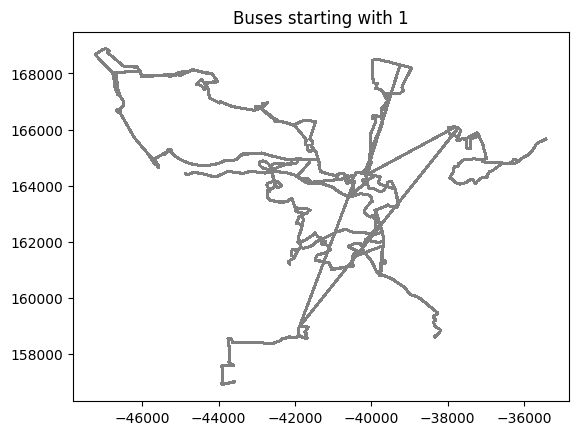

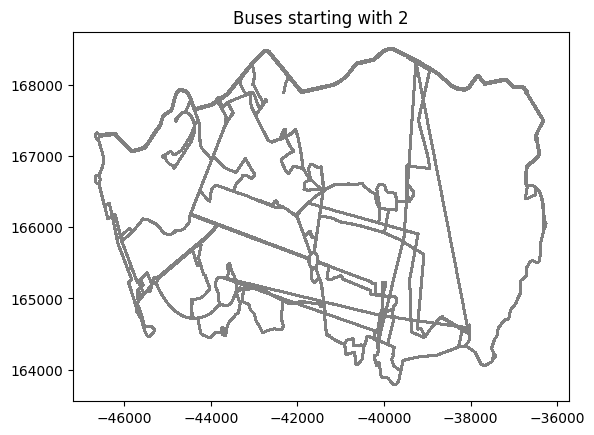

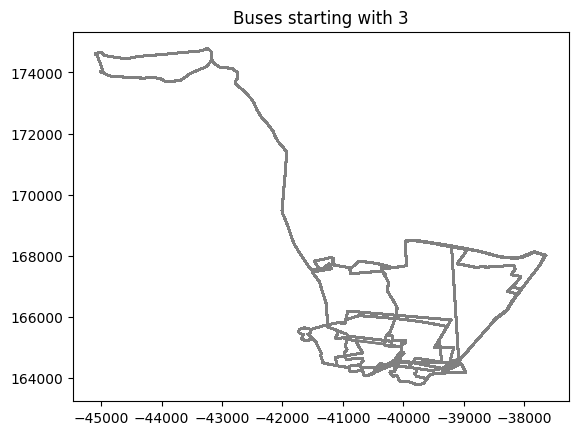

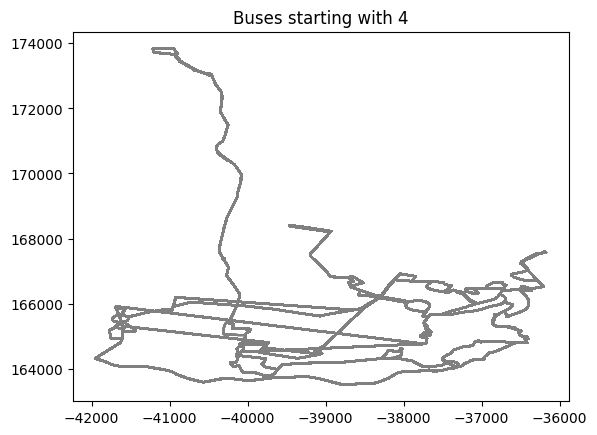

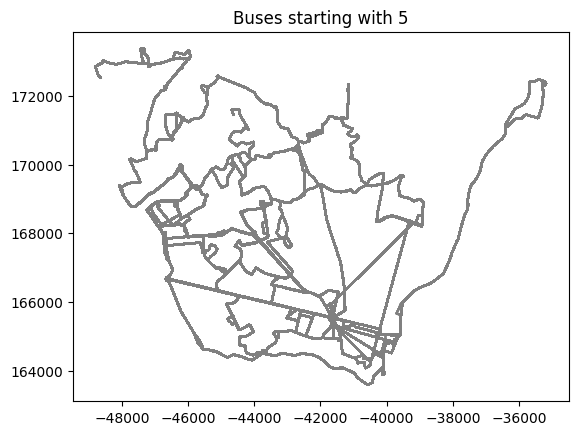

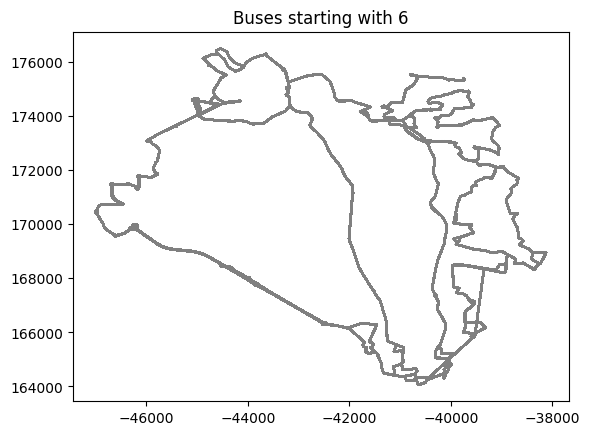

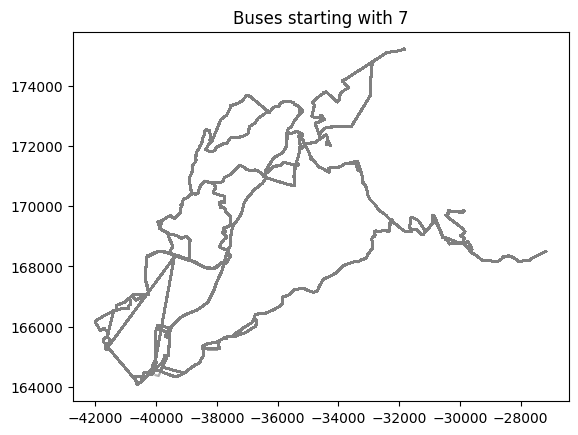

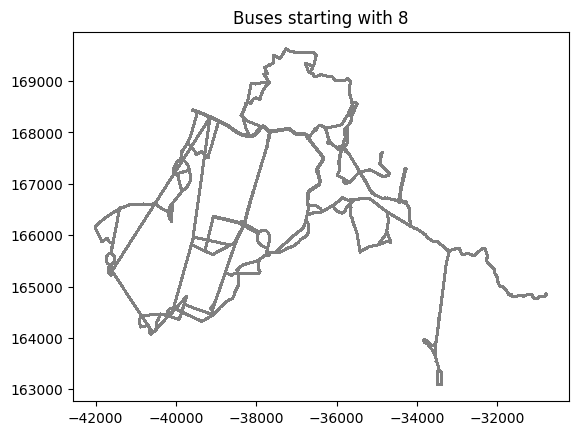

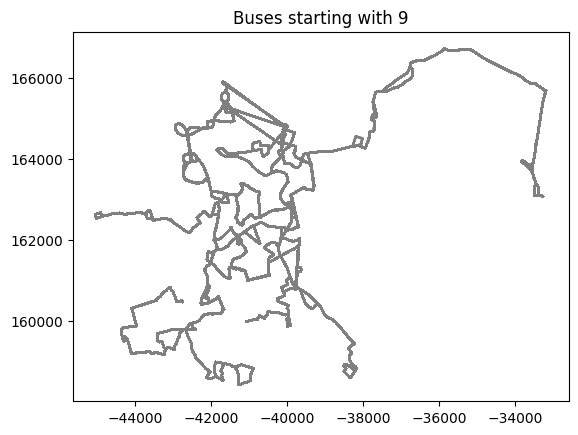

In [10]:
for num in dic.keys():
    shapes = dic[num]
    
    xs = []
    ys = []
    
    for row in shapes:
        xs.append(float(row[1]))
        ys.append(float(row[2]))
        plt.plot(xs,ys,color='gray',alpha=0.2)
    plt.title(f'Buses starting with {num}')
    plt.savefig(f'Buses{num}')
    plt.show()